In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df_unique_content_viewers = pd.read_csv('df_unique_content_viewers.csv')
df_reactions = pd.read_csv('df_reactions_with_datetime.csv')

### 1. Average Posts per day

In [260]:
df_reactions['Datetime'] = pd.to_datetime(df_reactions['Datetime'])
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Content ID       22534 non-null  object        
 1   User ID          22534 non-null  object        
 2   Reaction Type    22534 non-null  object        
 3   Datetime         22534 non-null  datetime64[ns]
 4   Category         22534 non-null  object        
 5   Sentiment_score  22534 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.0+ MB


In [261]:
df_reactions['Date'] = df_reactions['Datetime'].dt.date

# Step 2: Group by the 'Date' and count the number of unique 'Content ID' per day
content_count_per_day = df_reactions.groupby('Date')['Content ID'].nunique()

# Display the result
average_content_per_day = content_count_per_day.mean()

# Display the result
print(f'Average number of unique content IDs per day: {average_content_per_day:.2f}')

Average number of unique content IDs per day: 59.30


### 2. Total Unique Categories available

In [262]:
df_unique_content_viewers.head(2)

,Content ID,Unique User Count,Unique Reaction Count,Mean Reaction Sentiment,Median Reaction Sentiment,Overall Sentiment,Category,Sentiment Difference
0,004e820e-49c3-4ba2-9d02-62db0065410c,1,1,60.000000,60,positive,tennis,0.000000
1,00d0cdf9-5919-4102-bf84-ebde253c3cd2,40,16,41.333333,45,positive,healthy eating,3.666667


In [263]:
df_unique_content_viewers['Category'].nunique()

17

### 3. Total Unique Contents available

In [264]:
df_unique_content_viewers['Content ID'].nunique()

962

There are 962 total contents.

### 4. No. of content posts per month

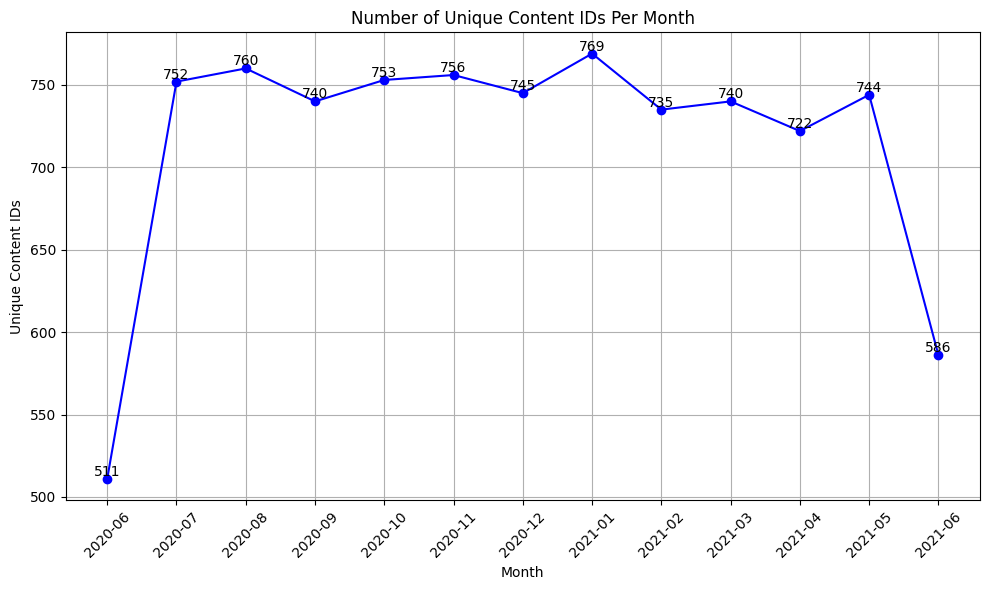

In [265]:
df_reactions['Month'] = df_reactions['Datetime'].dt.to_period('M')

# Step 2: Group by the 'Month' and count the number of unique 'Content ID' per month
content_count_per_month = df_reactions.groupby('Month')['Content ID'].nunique()

# Step 3: Plot the results as a line chart
plt.figure(figsize=(10, 6))
plt.plot(content_count_per_month.index.astype(str), content_count_per_month.values, marker='o', linestyle='-', color='b')

# Add labels to each point
for i, value in enumerate(content_count_per_month.values):
    plt.text(content_count_per_month.index.astype(str)[i], value, f'{value}', ha='center', va='bottom')

# Customize the plot
plt.title('Number of Unique Content IDs Per Month')
plt.xlabel('Month')
plt.ylabel('Unique Content IDs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### 5. Most viewed content

This will be the content which has maximum viewers.

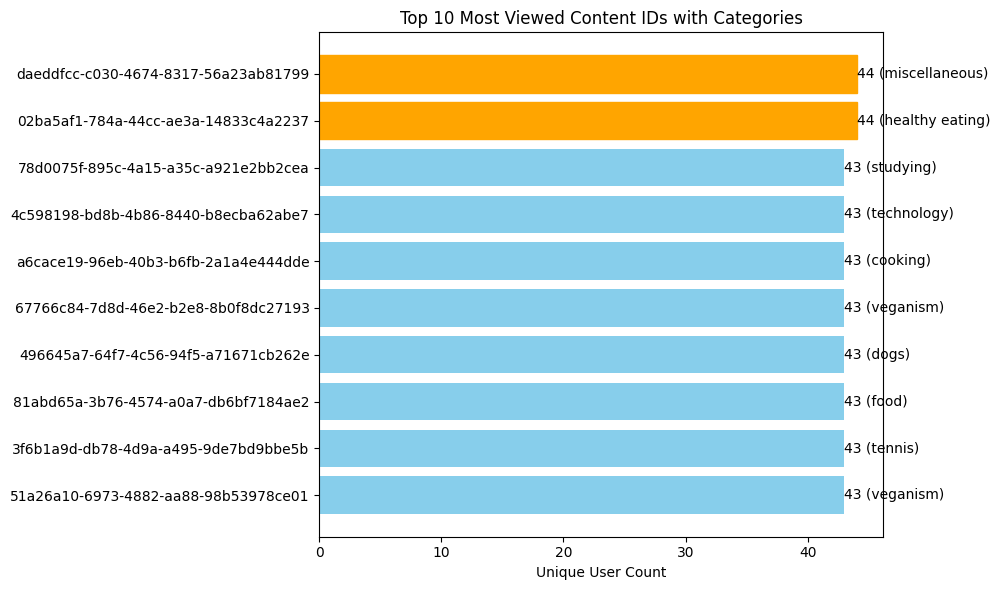

In [266]:
import matplotlib.pyplot as plt

# Assuming df_unique_content_viewers contains 'Content ID' and 'Category'
# Sort the top 10 most viewed content based on 'Unique User Count'
top_viewed_content = df_unique_content_viewers.sort_values(by='Unique User Count', ascending=False).head(10)

# Identify the maximum value and the corresponding content ID
max_value = top_viewed_content['Unique User Count'].max()
max_content_id = top_viewed_content[top_viewed_content['Unique User Count'] == max_value]['Content ID'].values[0]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top_viewed_content['Content ID'], top_viewed_content['Unique User Count'], color='skyblue')

# Highlight the maximum bar
for bar in bars:
    if bar.get_width() == max_value:
        bar.set_color('orange')  # Change color for the maximum bar

# Add labels for both Unique User Count and Category
for i, bar in enumerate(bars):
    content_id = top_viewed_content['Content ID'].values[i]
    user_count = bar.get_width()
    category = top_viewed_content['Category'].values[i]  # Get the category for each content ID
    
    # Text for Unique User Count and Category
    label_text = f'{user_count} ({category})'
    
    # Add the label to the bar
    plt.text(user_count, bar.get_y() + bar.get_height() / 2, 
             label_text, 
             va='center', ha='left', color='black')

# Customize plot labels and title
plt.xlabel('Unique User Count')
plt.title('Top 10 Most Viewed Content IDs with Categories')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest on top
plt.tight_layout()

# Show the plot
plt.show()


In [267]:
len(df_unique_content_viewers[df_unique_content_viewers['Unique User Count']==1])

17

There are 17 contents with just 1 viewer.

### 6. Most favourite content and least favourite content

In [268]:
df_unique_content_viewers['Median Reaction Sentiment'].median()

35.0

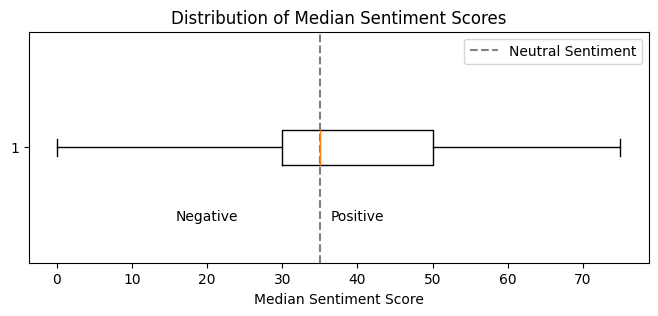

In [269]:
plt.figure(figsize=(8, 3))
plt.boxplot(df_unique_content_viewers['Median Reaction Sentiment'], vert=False)

# Add title and labels
plt.title('Distribution of Median Sentiment Scores')
plt.xlabel('Median Sentiment Score')

# Add annotations to highlight positive and negative sentiment
plt.axvline(x=35, color='gray', linestyle='--', label='Neutral Sentiment')
plt.text(40, 0.7, 'Positive', ha='center', va='center', rotation=0)
plt.text(20, 0.7, 'Negative', ha='center', va='center', rotation=0)

# Legend
plt.legend()

plt.show()

It is clear that most of the sentiment for the data is positive with median being 35.

1. Most Positive sentiment content

In [270]:
top_positive_content = df_unique_content_viewers.sort_values(by='Median Reaction Sentiment', ascending=False).head(5)

# Display the top 5 most positive content
top_positive_content[['Content ID', 'Median Reaction Sentiment', 'Unique User Count', 'Category']]

,Content ID,Median Reaction Sentiment,Unique User Count,Category
658,ae909545-786e-4089-9ef3-61c3c9fd3efd,75,1,education
508,85260ec2-7b35-4266-8071-580a8b4341ca,72,3,tennis
757,c59e27e9-0439-4699-8ea0-5e93f662a05d,72,1,fitness
655,ad5ddd13-b8ea-4174-ad71-da1663c7f959,72,3,miscellaneous
939,f7c26d94-b7c6-45a0-b882-354d8d89c2af,72,3,science


Here, we can see that only 1-3 viewers have watched the content and have provided highest positive sentiment towards the content.

In [271]:
top_positive_content = df_unique_content_viewers.sort_values(by='Unique User Count', ascending=False).head(5)

# Step 2: Include the Unique User Count
top_positive_content = top_positive_content[['Content ID', 'Unique User Count','Median Reaction Sentiment', 'Overall Sentiment','Category']]

# Step 3: Sort by Unique User Count to find the most watched content
most_watched_positive_content = top_positive_content.sort_values(by='Median Reaction Sentiment', ascending=False)

# Display the result
most_watched_positive_content

,Content ID,Unique User Count,Median Reaction Sentiment,Overall Sentiment,Category
9,02ba5af1-784a-44cc-ae3a-14833c4a2237,44,50,positive,healthy eating
628,a6cace19-96eb-40b3-b6fb-2a1a4e444dde,43,50,positive,cooking
459,78d0075f-895c-4a15-a35c-a921e2bb2cea,43,45,positive,studying
301,4c598198-bd8b-4b86-8440-b8ecba62abe7,43,35,neutral,technology
824,daeddfcc-c030-4674-8317-56a23ab81799,44,20,neutral,miscellaneous


So, here we can see that most popular content in positive sentiment are: 02ba5af1-784a-44cc-ae3a-14833c4a2237 and a6cace19-96eb-40b3-b6fb-2a1a4e444dde with positive sentiment of 50.

In [272]:
top_negative_content = df_unique_content_viewers.sort_values(by='Unique User Count', ascending=False).head(20)

# Step 2: Include the Unique User Count
top_negative_content = top_negative_content[['Content ID', 'Unique User Count','Median Reaction Sentiment', 'Overall Sentiment', 'Category']]

# Step 3: Sort by Unique User Count to find the most watched content
most_watched_negative_content = top_negative_content.sort_values(by='Median Reaction Sentiment', ascending=True)

# Display the result
most_watched_negative_content

,Content ID,Unique User Count,Median Reaction Sentiment,Overall Sentiment,Category
819,d90a34f1-60ed-4a79-b7bf-fd22efa12e4c,42,15,negative,travel
824,daeddfcc-c030-4674-8317-56a23ab81799,44,20,neutral,miscellaneous
828,dcaa5091-1246-4d3c-aed8-dcd8e1da69cc,43,20,neutral,science
208,36d36f19-7a10-4d7d-a3ab-a3f2cbbfcf4a,43,20,neutral,food
171,2d10f5b0-c590-429f-8b68-52c239617d26,42,30,positive,technology
287,496645a7-64f7-4c56-94f5-a71671cb262e,43,35,neutral,dogs
494,81abd65a-3b76-4574-a0a7-db6bf7184ae2,43,35,neutral,food
237,3f6b1a9d-db78-4d9a-a495-9de7bd9bbe5b,43,35,neutral,tennis
301,4c598198-bd8b-4b86-8440-b8ecba62abe7,43,35,neutral,technology
321,51a26a10-6973-4882-aa88-98b53978ce01,43,35,neutral,veganism


In the top 20 most viewed content, the most negative sentiment is for content d90a34f1-60ed-4a79-b7bf-fd22efa12e4c	with 42 viewers with just 15 sentiment score making it the most viewed worst show.

### 7. Most popular content based on online engagement/reactions

In [273]:
df_unique_content_viewers['Unique Reaction Count'].mean()

11.238045738045738

In [274]:
df_unique_content_viewers['Unique Reaction Count'].median()

13.0

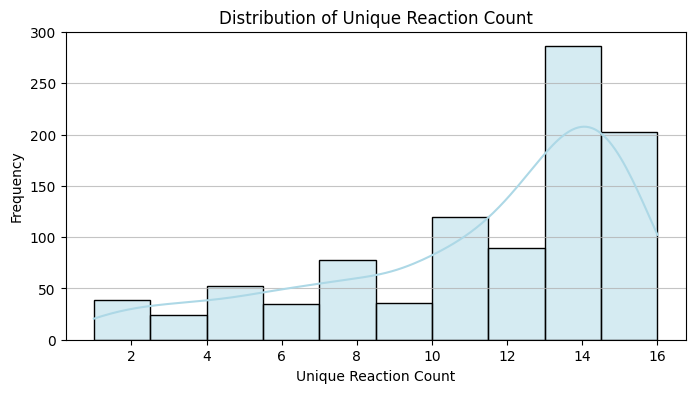

In [275]:
plt.figure(figsize=(8, 4))
sns.histplot(df_unique_content_viewers['Unique Reaction Count'], bins=10, color='lightblue', kde=True)
plt.title('Distribution of Unique Reaction Count')
plt.xlabel('Unique Reaction Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

We can see that most of the content (>200 contents) has high interactions of around 16. The median no. of reactions here is 14.

In [276]:
df_reactions.head()

,Content ID,User ID,Reaction Type,Datetime,Category,Sentiment_score,Date,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,studying,0,2020-11-07,2020-11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,studying,10,2021-06-17,2021-06
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,studying,15,2021-04-18,2021-04
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,studying,0,2021-01-06,2021-01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,studying,30,2020-08-23,2020-08


#### Most popular reaction used by viewers of the contents is:

In [277]:
df_reactions['Reaction Type'].nunique()

16

There are total 16 unique reactions.

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\1350005932.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_reactions.index, x=top_5_reactions.values, palette='viridis')


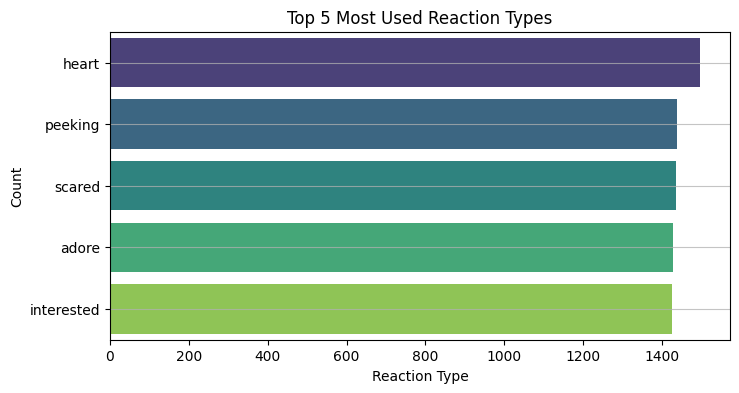

In [278]:
reaction_counts = df_reactions['Reaction Type'].value_counts()
top_5_reactions = reaction_counts.nlargest(5)

# Step 3: Plot the Results
plt.figure(figsize=(8, 4))
sns.barplot(y=top_5_reactions.index, x=top_5_reactions.values, palette='viridis')
plt.title('Top 5 Most Used Reaction Types')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

So here we see that most used reaction is heart.

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\944020864.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_5_heart_reactions.index, x=top_5_heart_reactions.values, palette='viridis')


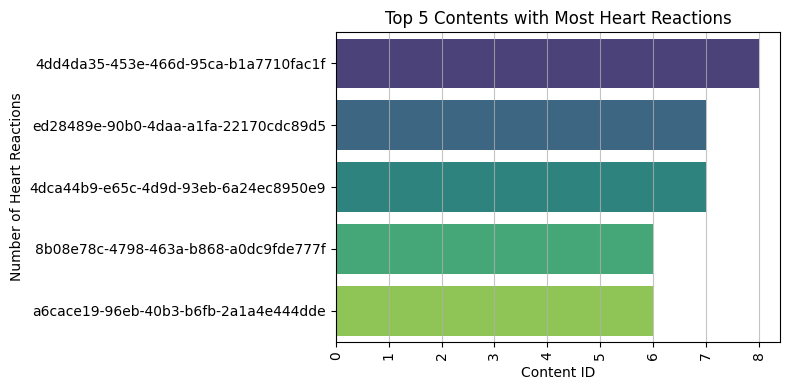

In [279]:
# Filter Heart Reactions
heart_reactions = df_reactions[df_reactions['Reaction Type'] == 'heart']

# Count Heart Reactions
heart_reaction_counts = heart_reactions['Content ID'].value_counts()

# Select Top 5
top_5_heart_reactions = heart_reaction_counts.nlargest(5)

# Plot the Results
plt.figure(figsize=(8, 4))
sns.barplot(y=top_5_heart_reactions.index, x=top_5_heart_reactions.values, palette='viridis')
plt.title('Top 5 Contents with Most Heart Reactions')
plt.xlabel('Content ID')
plt.ylabel('Number of Heart Reactions')
plt.grid(axis='x', alpha=0.75)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\1488351566.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_6_heart_reactions_df['Label'], x=top_6_heart_reactions_df['Heart Reactions'], palette='viridis')


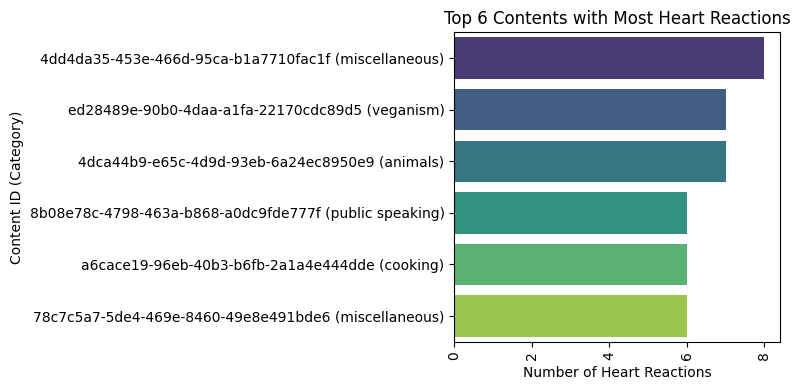

In [280]:
# Filter Heart Reactions
heart_reactions = df_reactions[df_reactions['Reaction Type'] == 'heart']

# Count Heart Reactions by Content ID
heart_reaction_counts = heart_reactions['Content ID'].value_counts()

# Select Top 5 Content IDs with Most Heart Reactions
top_6_heart_reactions = heart_reaction_counts.nlargest(6)

# Extract the relevant category for each Content ID in the top 5
top_6_heart_reactions_df = df_unique_content_viewers[df_unique_content_viewers['Content ID'].isin(top_6_heart_reactions.index)]

# Merge the heart reaction counts with the corresponding categories
top_6_heart_reactions_df = top_6_heart_reactions_df.set_index('Content ID').loc[top_6_heart_reactions.index]
top_6_heart_reactions_df['Heart Reactions'] = top_6_heart_reactions.values

# Create new y-axis labels combining Content ID and Category
top_6_heart_reactions_df['Label'] = top_6_heart_reactions_df.index + ' (' + top_6_heart_reactions_df['Category'] + ')'

# Plot the Results
plt.figure(figsize=(8, 4))
sns.barplot(y=top_6_heart_reactions_df['Label'], x=top_6_heart_reactions_df['Heart Reactions'], palette='viridis')

# Customize the plot
plt.title('Top 6 Contents with Most Heart Reactions')
plt.xlabel('Number of Heart Reactions')
plt.ylabel('Content ID (Category)')
plt.grid(False)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()

In [281]:
top_5_heart_reactions

Content ID
4dd4da35-453e-466d-95ca-b1a7710fac1f    8
ed28489e-90b0-4daa-a1fa-22170cdc89d5    7
4dca44b9-e65c-4d9d-93eb-6a24ec8950e9    7
8b08e78c-4798-463a-b868-a0dc9fde777f    6
a6cace19-96eb-40b3-b6fb-2a1a4e444dde    6
Name: count, dtype: int64

In [282]:
for content_id in top_5_heart_reactions.index:  # Iterate over the index (which are the Content IDs)
    content_details = df_unique_content_viewers[df_unique_content_viewers['Content ID'] == content_id]
    
    # Print the content ID and its details
    print(f"Content ID: {content_id}")
    print(content_details[['Unique User Count','Unique Reaction Count','Category']])
    print("\n")


Content ID: 4dd4da35-453e-466d-95ca-b1a7710fac1f
     Unique User Count  Unique Reaction Count       Category
305                 41                     15  miscellaneous


Content ID: ed28489e-90b0-4daa-a1fa-22170cdc89d5
     Unique User Count  Unique Reaction Count  Category
896                 31                     15  veganism


Content ID: 4dca44b9-e65c-4d9d-93eb-6a24ec8950e9
     Unique User Count  Unique Reaction Count Category
304                 32                     14  animals


Content ID: 8b08e78c-4798-463a-b868-a0dc9fde777f
     Unique User Count  Unique Reaction Count         Category
531                 25                     14  public speaking


Content ID: a6cace19-96eb-40b3-b6fb-2a1a4e444dde
     Unique User Count  Unique Reaction Count Category
628                 43                     15  cooking




In [283]:
heart_reactions = df_reactions[df_reactions['Reaction Type'] == 'heart']
peeking_reactions = df_reactions[df_reactions['Reaction Type'] == 'peeking']
scared_reactions = df_reactions[df_reactions['Reaction Type'] == 'scared']
adore_reactions = df_reactions[df_reactions['Reaction Type'] == 'adore']
interested_reactions = df_reactions[df_reactions['Reaction Type'] == 'interested']

# Count Heart Reactions
heart_reaction_counts = heart_reactions['Content ID'].value_counts()
peeking_reaction_counts = peeking_reactions['Content ID'].value_counts()
scared_reaction_counts = scared_reactions['Content ID'].value_counts()
adore_reaction_counts = adore_reactions['Content ID'].value_counts()
interested_reaction_counts = interested_reactions['Content ID'].value_counts()

# Select Top 5
top_5_heart_reactions = heart_reaction_counts.nlargest(5)
top_5_peeking_reactions = peeking_reaction_counts.nlargest(5)
top_5_scared_reactions = scared_reaction_counts.nlargest(5)
top_5_adore_reactions = adore_reaction_counts.nlargest(5)
top_5_interested_reactions = interested_reaction_counts.nlargest(5)

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\3528241666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reaction.index, x=top_reaction.values, palette='viridis', ax=axs[i])
C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\3528241666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reaction.index, x=top_reaction.values, palette='viridis', ax=axs[i])
C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\3528241666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reaction.index, x=top_reaction.values, palette

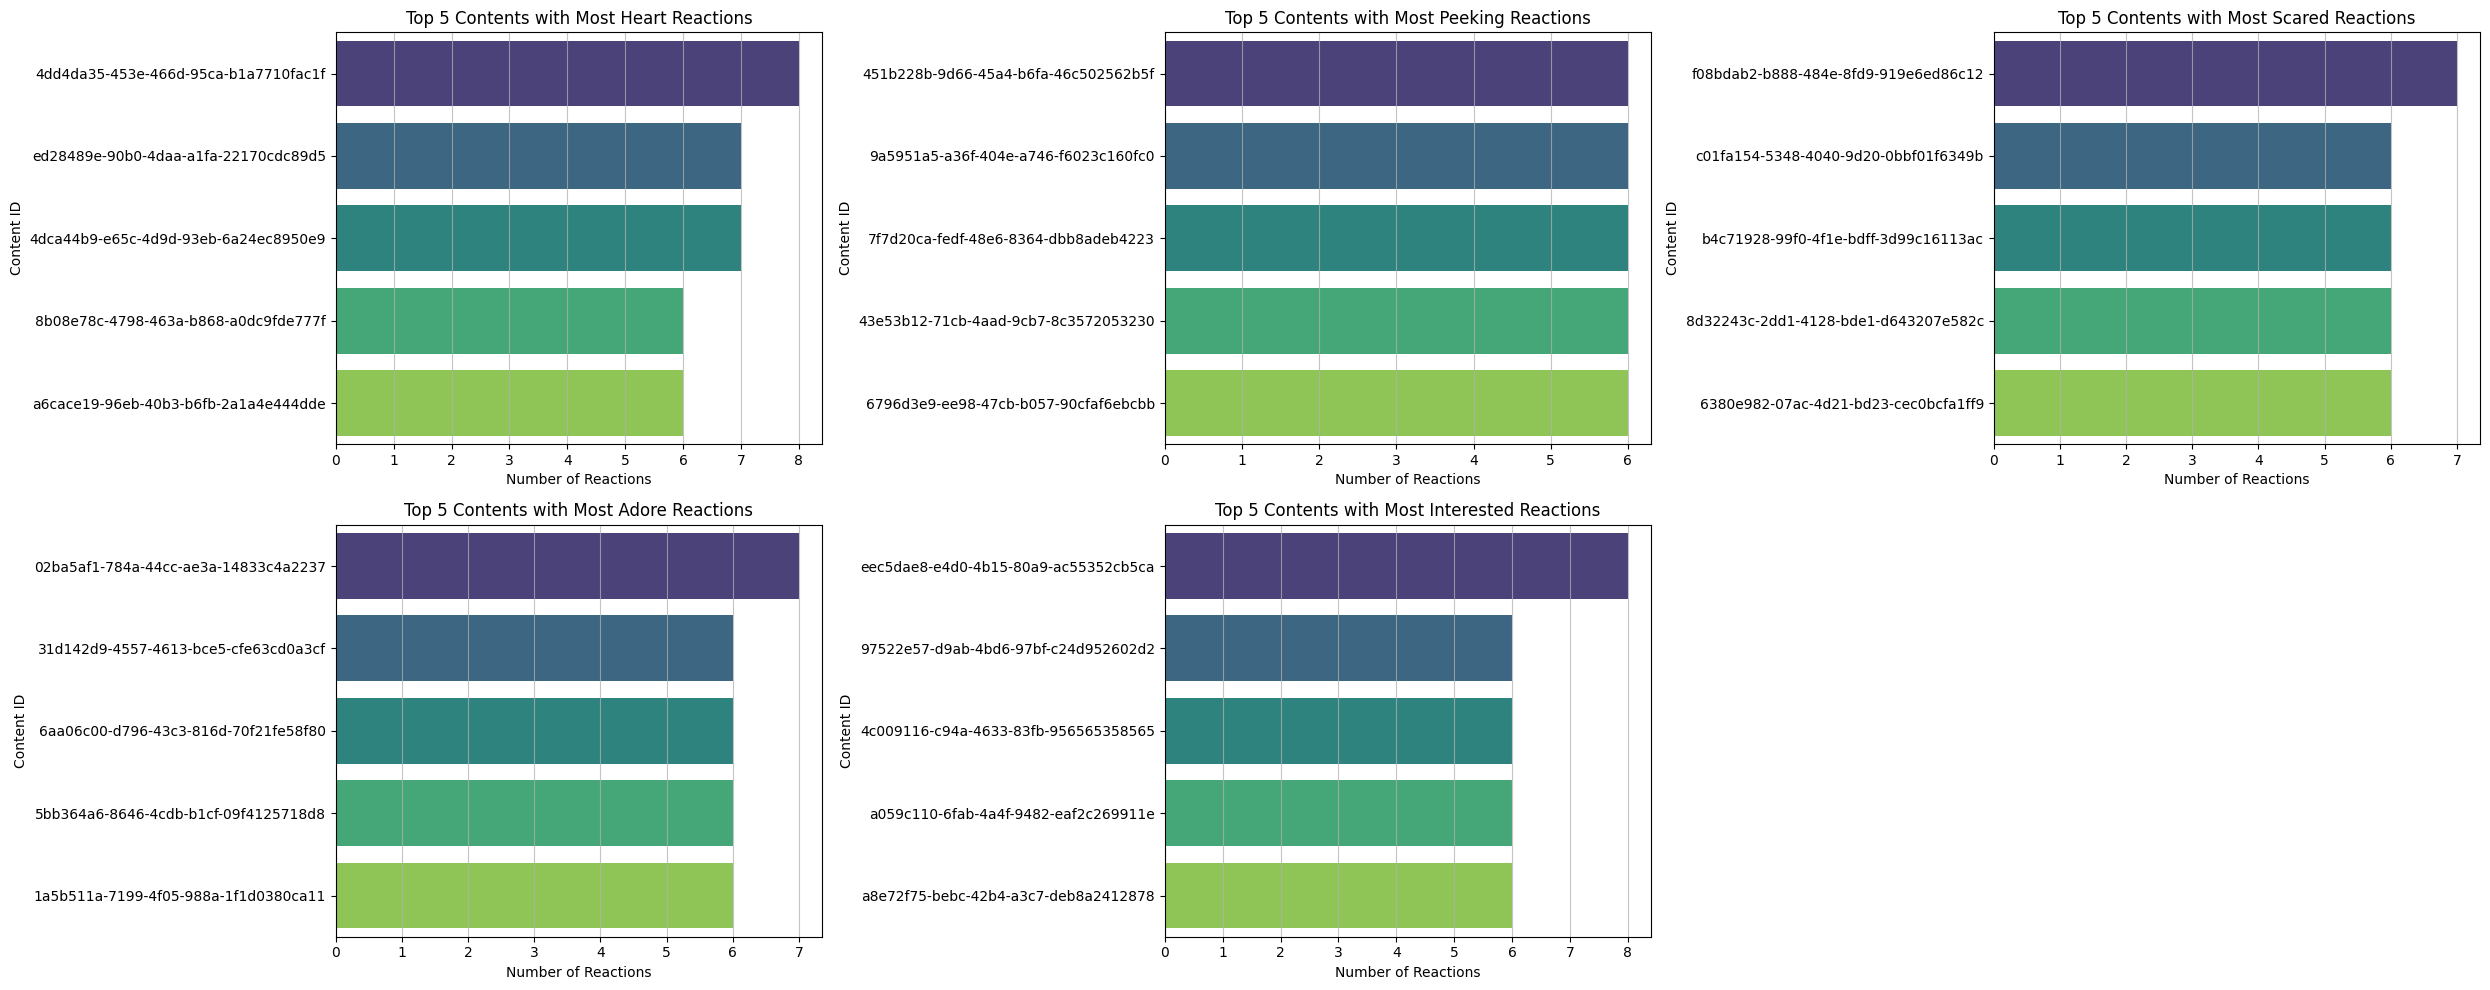

In [284]:
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
axs = axs.flatten()
# Plot each reaction type in its own subplot
reaction_types = ['heart', 'peeking', 'scared', 'adore', 'interested']
top_reactions = [top_5_heart_reactions, top_5_peeking_reactions, top_5_scared_reactions, top_5_adore_reactions, top_5_interested_reactions]

for i, (reaction, top_reaction) in enumerate(zip(reaction_types, top_reactions)):
    sns.barplot(y=top_reaction.index, x=top_reaction.values, palette='viridis', ax=axs[i])
    axs[i].set_title(f'Top 5 Contents with Most {reaction.capitalize()} Reactions')
    axs[i].set_xlabel('Number of Reactions')
    axs[i].set_ylabel('Content ID')
    axs[i].grid(axis='x', alpha=0.75)
    axs[i].tick_params(axis='y', rotation=0)  # Rotate y-axis labels if necessary

# Hide any unused subplots
for j in range(len(reaction_types), len(axs)):
    axs[j].axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()  # Adjust layout to fit all subplots
plt.show()

### 8. Most Popular Category

In [285]:
df_unique_content_viewers.Category.value_counts()

Category
miscellaneous      190
travel              60
science             54
animals             52
culture             52
technology          51
tennis              50
cooking             50
fitness             49
healthy eating      48
dogs                48
education           46
food                46
soccer              46
veganism            43
studying            39
public speaking     38
Name: count, dtype: int64

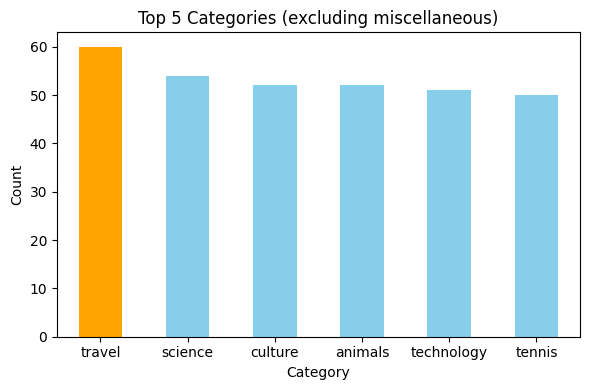

In [286]:
# Filter out 'miscellaneous' category and get top 6 categories
top_6_categories = df_unique_content_viewers[df_unique_content_viewers['Category'] != 'miscellaneous']['Category'].value_counts().head(6)

# Step 3: Identify the most popular category
most_popular_category = top_6_categories.idxmax()  # Get the name of the most popular category

# Step 4: Plot the data with highlighted bar
plt.figure(figsize=(6, 4))

# Create a color list where the most popular category is highlighted
colors = ['orange' if category == most_popular_category else 'skyblue' for category in top_6_categories.index]

top_6_categories.plot(kind='bar', color=colors)
plt.title('Top 5 Categories (excluding miscellaneous)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

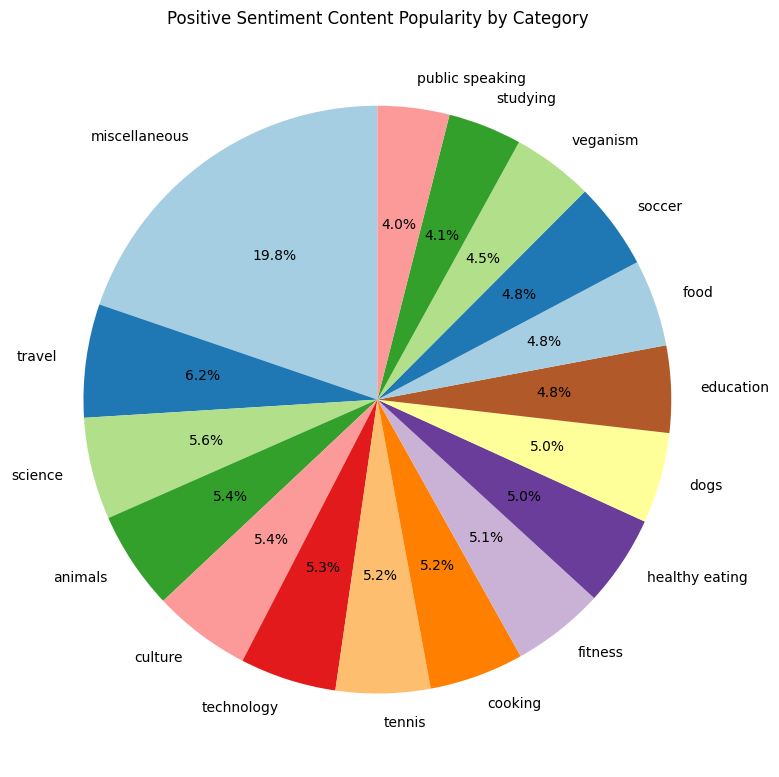

In [287]:
# Step 1: Group by 'Category' and count the number of content IDs per category
category_popularity = df_unique_content_viewers['Category'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_popularity, labels=category_popularity.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Positive Sentiment Content Popularity by Category')

# Show the pie chart
plt.tight_layout()
plt.show()

In [288]:
top_5_popular_categories = df_unique_content_viewers.sort_values(by='Unique User Count', ascending=False).head(5)

# Step 2: Include the Unique User Count
top_5_popular_categories = top_5_popular_categories[['Content ID', 'Unique User Count', 'Category', 'Overall Sentiment']]

# Step 3: Sort by Unique User Count to find the most watched content
most_watched_category = top_5_popular_categories.sort_values(by='Unique User Count', ascending=False)

# Display the result
most_watched_category

,Content ID,Unique User Count,Category,Overall Sentiment
824,daeddfcc-c030-4674-8317-56a23ab81799,44,miscellaneous,neutral
9,02ba5af1-784a-44cc-ae3a-14833c4a2237,44,healthy eating,positive
459,78d0075f-895c-4a15-a35c-a921e2bb2cea,43,studying,positive
301,4c598198-bd8b-4b86-8440-b8ecba62abe7,43,technology,neutral
628,a6cace19-96eb-40b3-b6fb-2a1a4e444dde,43,cooking,positive


In [289]:
# Step 1: Filter the DataFrame
filtered_df = df_unique_content_viewers[
    (df_unique_content_viewers['Unique User Count'] > 30) &
    (df_unique_content_viewers['Median Reaction Sentiment'] > 50)
]

# Step 2: Group by Category and count unique viewers
top_category_counts = filtered_df.Category.value_counts().nlargest(5)

# Display the result
print('No. contents with viewers > 30 and median reaction sentiment > 50 is :', len(filtered_df))

No. contents with viewers > 30 and median reaction sentiment > 50 is : 15


In [290]:
filtered_df

,Content ID,Unique User Count,Unique Reaction Count,Mean Reaction Sentiment,Median Reaction Sentiment,Overall Sentiment,Category,Sentiment Difference
90,1987b43d-bcb9-4ab0-8634-ef3623928e94,31,11,48.548387,60,positive,miscellaneous,11.451613
157,292051b5-b835-4a60-962a-bddf10da82bd,39,14,50.275000,60,positive,technology,9.725000
187,31d142d9-4557-4613-bce5-cfe63cd0a3cf,41,16,48.024390,60,positive,soccer,11.975610
304,4dca44b9-e65c-4d9d-93eb-6a24ec8950e9,32,14,48.944444,60,positive,animals,11.055556
305,4dd4da35-453e-466d-95ca-b1a7710fac1f,41,15,45.363636,60,positive,miscellaneous,14.636364
314,503bd384-9733-4739-81f5-561b2328f6d8,37,13,46.675676,60,positive,food,13.324324
392,65304022-f925-48f0-9dfc-436578f22c77,35,15,47.222222,60,positive,soccer,12.777778
461,79818849-98f9-4b6b-9be8-4ed4c1ad59a5,35,13,49.628571,60,positive,fitness,10.371429
578,972b6e82-421f-43f6-905c-2168933de18f,34,12,49.257143,65,positive,animals,15.742857
588,9a2c328f-16aa-490c-8ca2-c7deaa90db3f,36,15,44.378378,60,positive,culture,15.621622


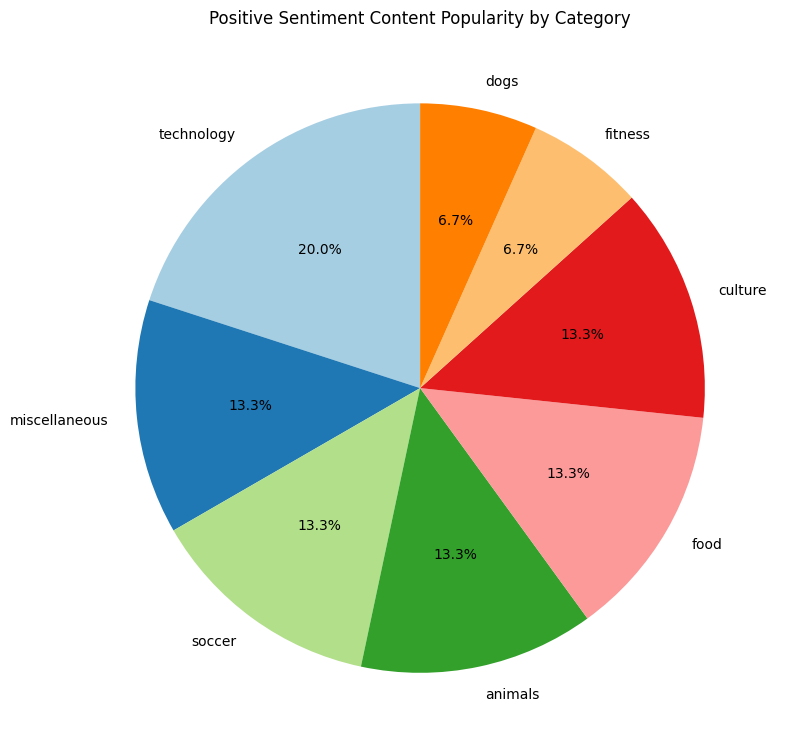

In [291]:
# Step 1: Group by 'Category' and count the number of content IDs per category
category_popularity = filtered_df['Category'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_popularity, labels=category_popularity.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Positive Sentiment Content Popularity by Category')

# Show the pie chart
plt.tight_layout()
plt.show()

In [292]:
print(top_category_counts)

Category
technology       3
miscellaneous    2
soccer           2
animals          2
food             2
Name: count, dtype: int64


So the top most popular categories are Technology, Miscelleanous, soccer, animals, food.

In [293]:
# Step 1: Filter the DataFrame
neg_filtered_df = df_unique_content_viewers[
    (df_unique_content_viewers['Unique User Count'] < 30) &
    (df_unique_content_viewers['Median Reaction Sentiment'] < 50)
]

# Display the result
print('No. contents with viewers < 30 and median reaction sentiment < 50 is :', len(neg_filtered_df))

No. contents with viewers < 30 and median reaction sentiment < 50 is : 451


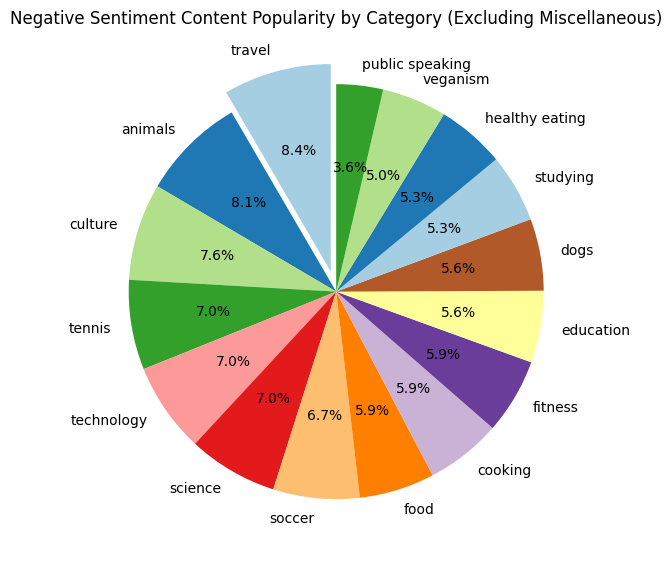

In [294]:
# Step 1: Filter out the 'miscellaneous' category and then group by 'Category'
neg_filtered_df_no_misc = neg_filtered_df[neg_filtered_df['Category'] != 'miscellaneous']
category_popularity = neg_filtered_df_no_misc['Category'].value_counts()

# Step 2: Identify the category with the highest count
highest_category = category_popularity.idxmax()
highest_value = category_popularity.max()

# Step 3: Create a color list and explode the highest category
colors = plt.cm.Paired.colors
explode = [0.1 if category == highest_category else 0 for category in category_popularity.index]

# Step 4: Plot the pie chart
plt.figure(figsize=(6, 8))
plt.pie(category_popularity, labels=category_popularity.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Add a title
plt.title('Negative Sentiment Content Popularity by Category (Excluding Miscellaneous)')

# Show the pie chart
plt.tight_layout()
plt.show()


In [295]:
# Extract the year and month from the 'Datetime' column
df_reactions['Month'] = df_reactions['Datetime'].dt.to_period('M')

# Filter out the 'miscellaneous' category
df_filtered = df_reactions[df_reactions['Category'] != 'miscellaneous']

# Group by Month and Category, then count the unique User IDs for each combination
category_popularity = df_filtered.groupby(['Month', 'Category'])['User ID'].nunique().reset_index()

# Find the most popular category for each month based on unique user count
most_popular_categories = category_popularity.loc[category_popularity.groupby('Month')['User ID'].idxmax()]

# Create a table displaying Month, Category, and the number of unique viewers
table = most_popular_categories[['Month', 'Category', 'User ID']].rename(columns={
    'Month': 'Year-Month',
    'User ID': 'No. of Unique Viewers'
})

# Display the table
print(table.to_string(index=False))

Year-Month       Category  No. of Unique Viewers
   2020-06        animals                     62
   2020-07         travel                    113
   2020-08        science                    114
   2020-09         travel                    110
   2020-10 healthy eating                    105
   2020-11        animals                    108
   2020-12         travel                    120
   2021-01        animals                    115
   2021-02     technology                     99
   2021-03        science                    109
   2021-04        science                    113
   2021-05         travel                    118
   2021-06        animals                     63


#### Category with highest reactions

C:\Users\Prajakta\AppData\Local\Temp\ipykernel_8112\2401892199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette='viridis')


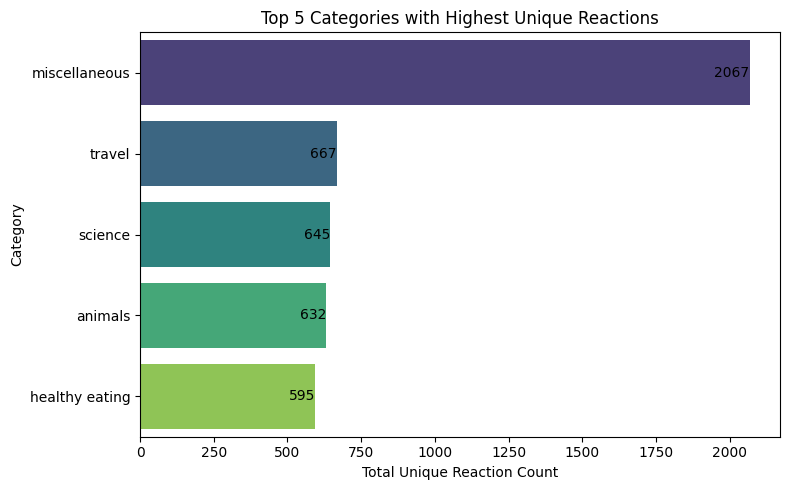

In [296]:
# Group by Category and sum the unique reaction counts
category_reactions = df_unique_content_viewers.groupby('Category')['Unique Reaction Count'].sum()

# Sort by total reactions and select the top 5 categories
top_5_categories = category_reactions.sort_values(ascending=False).head(5)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette='viridis')

# Add labels to the bars
for i, value in enumerate(top_5_categories):
    plt.text(value, i, f'{value}', va='center', ha='right', color='black')

# Customize the plot
plt.title('Top 5 Categories with Highest Unique Reactions')
plt.xlabel('Total Unique Reaction Count')
plt.ylabel('Category')
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

### 9. Daily reactions

In [297]:
df_reactions['Datetime'] = pd.to_datetime(df_reactions['Datetime'])
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22534 entries, 0 to 22533
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Content ID       22534 non-null  object        
 1   User ID          22534 non-null  object        
 2   Reaction Type    22534 non-null  object        
 3   Datetime         22534 non-null  datetime64[ns]
 4   Category         22534 non-null  object        
 5   Sentiment_score  22534 non-null  int64         
 6   Date             22534 non-null  object        
 7   Month            22534 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(5), period[M](1)
memory usage: 1.4+ MB


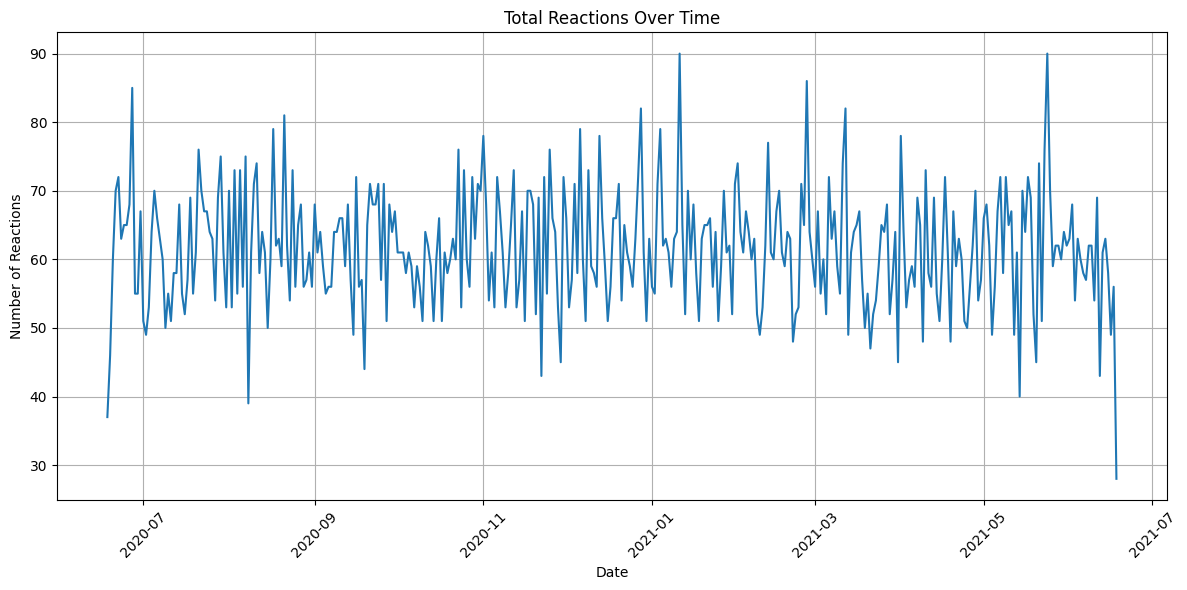

In [298]:
# Group by date and count reactions
daily_reactions = df_reactions.groupby(df_reactions['Datetime'].dt.date).size()

# Plot
plt.figure(figsize=(12, 6))
daily_reactions.plot(kind='line')
plt.title('Total Reactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reactions')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

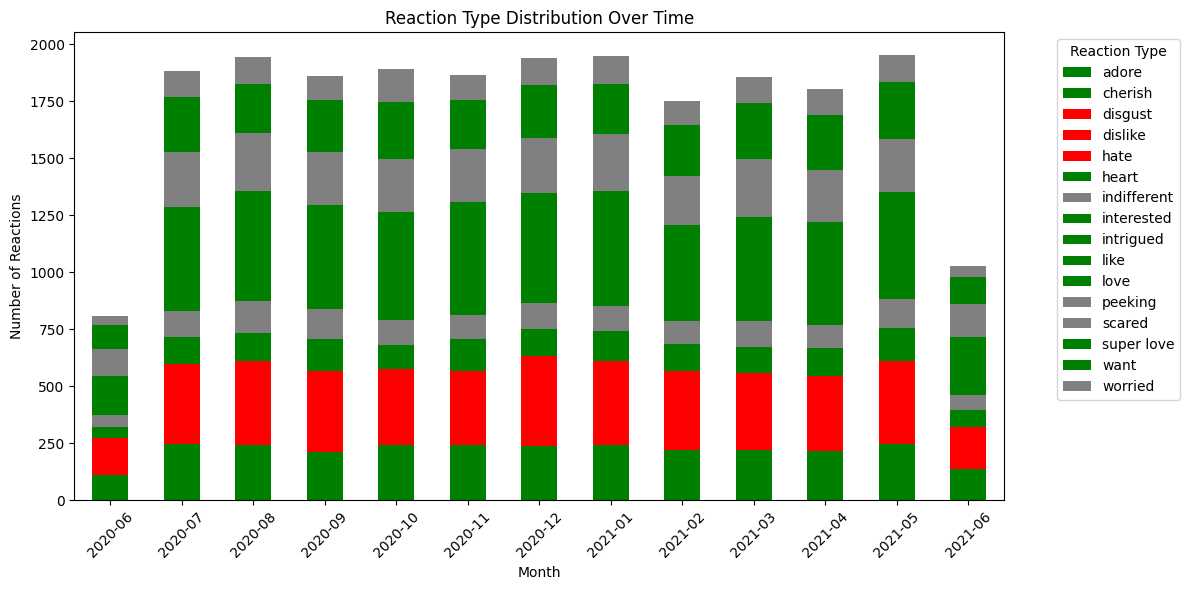

In [299]:
# Group by month and reaction type
reaction_type_over_time = df_reactions.groupby([df_reactions['Datetime'].dt.to_period('M'), 'Reaction Type']).size().unstack(fill_value=0)

# Define color mapping for reactions
color_map = {
    'heart': 'green',
    'love': 'green',
    'super love': 'green',
    'cherish': 'green',
    'want': 'green',
    'adore': 'green',
    'like': 'green',
    'interested': 'green',
    'intrigued': 'green',
    'indifferent': 'grey',
    'peeking': 'grey',
    'scared': 'grey',
    'worried': 'grey',
    'disgust': 'red',
    'hate': 'red',
    'dislike': 'red'
}

# Create a list of colors for the plot based on the reaction types
colors = [color_map[reaction] for reaction in reaction_type_over_time.columns]

# Plot
reaction_type_over_time.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Customize x-axis labels to show month and year
plt.title('Reaction Type Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(reaction_type_over_time.index)), labels=reaction_type_over_time.index.astype(str), rotation=45)
plt.legend(title='Reaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

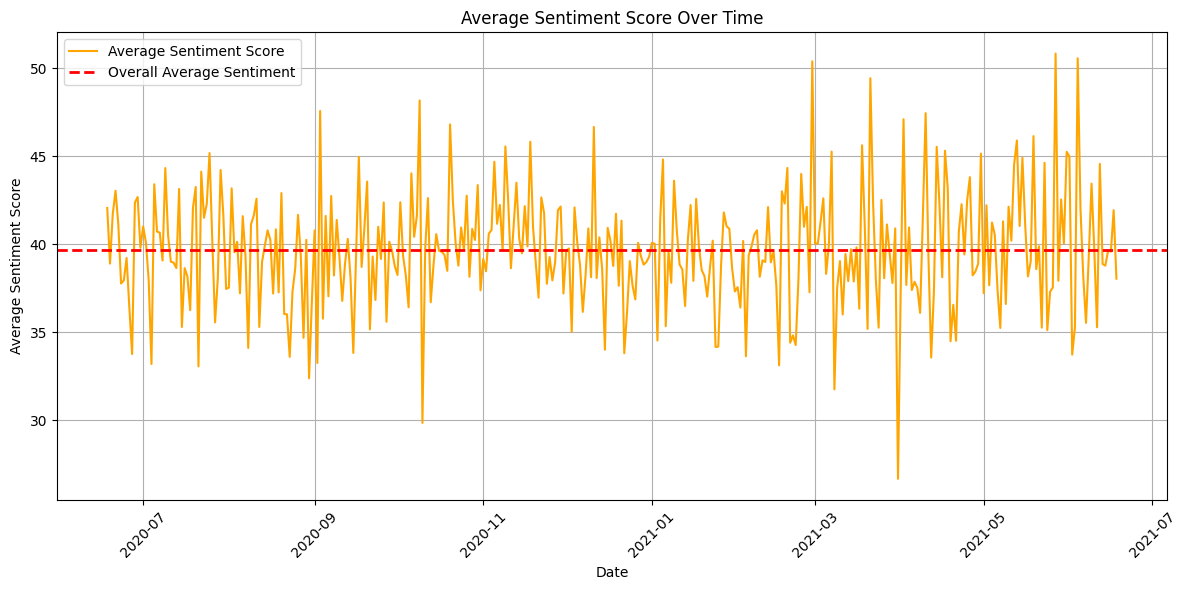

In [300]:
# Calculate average sentiment score by date
average_sentiment = df_reactions.groupby(df_reactions['Datetime'].dt.date)['Sentiment_score'].mean()

# Calculate overall average sentiment score
overall_average_sentiment = average_sentiment.mean()

# Plot
plt.figure(figsize=(12, 6))
average_sentiment.plot(kind='line', color='orange', label='Average Sentiment Score')
plt.axhline(y=overall_average_sentiment, color='red', linestyle='--', linewidth=2, label='Overall Average Sentiment')

# Customize the plot
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### 10. Total Users per month

Smallest Date: 2020-06-18 08:07:22
Largest Date: 2021-06-18 08:30:29


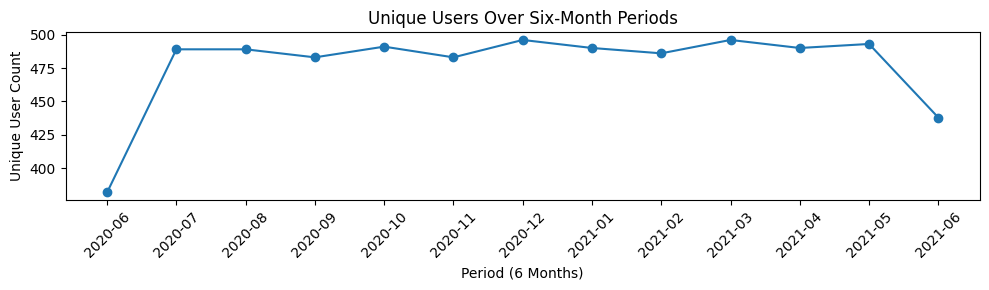

In [301]:
# Step 2: Print the smallest and largest date
smallest_date = df_reactions['Datetime'].min()
largest_date = df_reactions['Datetime'].max()
print(f'Smallest Date: {smallest_date}')
print(f'Largest Date: {largest_date}')

# Step 3: Create a new column for 6-month periods
df_reactions['Period'] = df_reactions['Datetime'].dt.to_period('6M')

# Step 4: Group by Period and count unique User IDs
unique_users_per_period = df_reactions.groupby('Period')['User ID'].nunique().reset_index()

# Rename columns for clarity
unique_users_per_period.columns = ['Period', 'Unique User Count']

# Step 5: Convert Period to string for plotting
unique_users_per_period['Period'] = unique_users_per_period['Period'].astype(str)

# Step 6: Plot the results
plt.figure(figsize=(10, 3))
plt.plot(unique_users_per_period['Period'], unique_users_per_period['Unique User Count'], marker='o')
plt.title('Unique Users Over Six-Month Periods')
plt.xlabel('Period (6 Months)')
plt.ylabel('Unique User Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

### 11. Average reaction per user

In [302]:
# Step 1: Group by User ID and count reactions
reaction_counts = df_reactions.groupby('User ID').size().reset_index(name='Reaction Count')

# Step 2: Calculate the average reactions per user
average_reactions = reaction_counts['Reaction Count'].mean()

# Display the result
print(f'Average reactions given by each user: {average_reactions:.2f}')

Average reactions given by each user: 45.07


### 12. User with most negative reactions

In [303]:
# Step 1: Define negative reaction types
negative_reactions = ['hate', 'dislike', 'worried', 'disgust', 'scared']

# Step 2: Filter for negative reactions
negative_df = df_reactions[df_reactions['Reaction Type'].isin(negative_reactions)]

# Step 3: Count negative reactions per user
negative_count = negative_df.groupby('User ID').size().reset_index(name='Negative Count')

# Step 4: Identify the user with the maximum negative reactions
max_negative_user = negative_count.loc[negative_count['Negative Count'].idxmax()]

# Display the result
print(f'User  with maximum negative reactions: {max_negative_user["User ID"]}')
print(f'Count of negative reactions: {max_negative_user["Negative Count"]}')

User  with maximum negative reactions: 48e26178-5cdd-4568-9990-d3bc5937910b
Count of negative reactions: 27


### 13. Most common reaction type

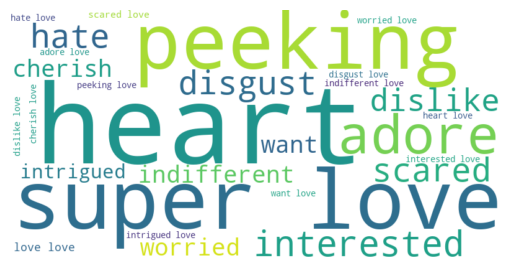

In [304]:
from wordcloud import WordCloud

# Generate a word cloud for reaction types
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_reactions['Reaction Type']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 14. Cohort Analysis

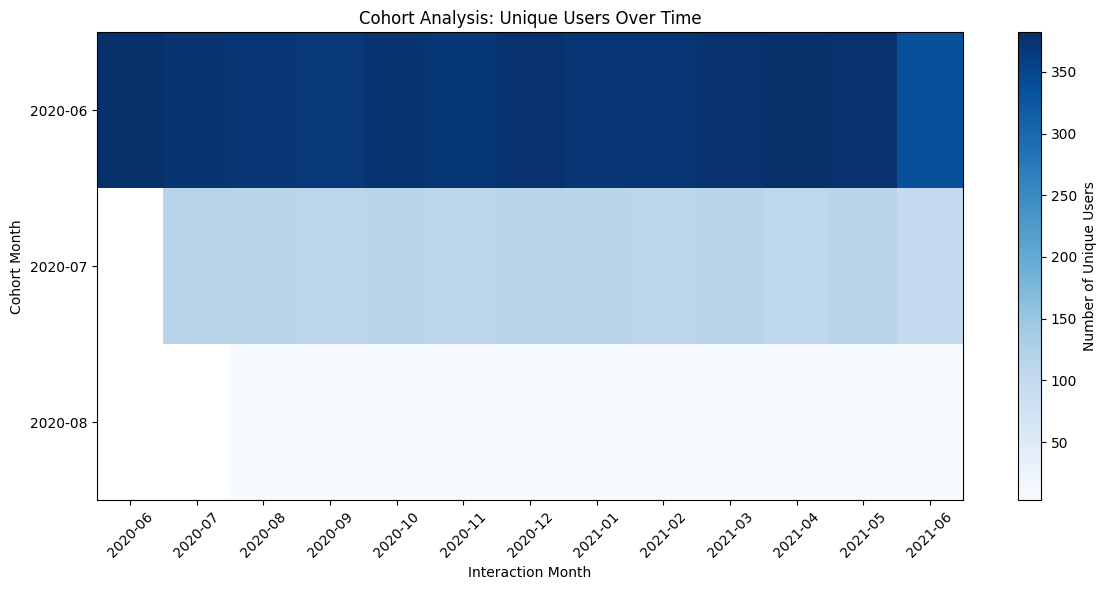

Interaction Month  2020-06  2020-07  2020-08  2020-09  2020-10  2020-11  \
Cohort Month                                                              
2020-06              382.0    374.0    373.0    370.0    375.0    371.0   
2020-07                NaN    115.0    113.0    110.0    113.0    109.0   
2020-08                NaN      NaN      3.0      3.0      3.0      3.0   

Interaction Month  2020-12  2021-01  2021-02  2021-03  2021-04  2021-05  \
Cohort Month                                                              
2020-06              378.0    373.0    373.0    378.0    380.0    377.0   
2020-07              115.0    114.0    110.0    115.0    107.0    113.0   
2020-08                3.0      3.0      3.0      3.0      3.0      3.0   

Interaction Month  2021-06  
Cohort Month                
2020-06              335.0  
2020-07              100.0  
2020-08                3.0  


In [305]:
# Convert Datetime to pandas datetime format
df_reactions['Datetime'] = pd.to_datetime(df_reactions['Datetime'])

# Step 1: Identify the first interaction date for each user
first_interaction = df_reactions.groupby('User ID')['Datetime'].min().reset_index()
first_interaction.columns = ['User ID', 'First Interaction Date']

# Step 2: Merge the first interaction date back to the original DataFrame
df_cohorts = pd.merge(df_reactions, first_interaction, on='User ID')

# Step 3: Calculate the cohort month and the month of each interaction
df_cohorts['Cohort Month'] = df_cohorts['First Interaction Date'].dt.to_period('M')
df_cohorts['Interaction Month'] = df_cohorts['Datetime'].dt.to_period('M')

# Step 4: Create a cohort table
cohort_table = df_cohorts.groupby(['Cohort Month', 'Interaction Month']).agg({
    'User ID': 'nunique',  # Count unique users in each cohort
    'Sentiment_score': 'mean'  # Calculate mean sentiment score
}).reset_index()

# Step 5: Pivot the cohort table for better visualization
cohort_pivot = cohort_table.pivot(index='Cohort Month', columns='Interaction Month', values='User ID')

# Step 6: Plot the cohort analysis
plt.figure(figsize=(12, 6))
plt.title('Cohort Analysis: Unique Users Over Time')
plt.imshow(cohort_pivot, aspect='auto', cmap='Blues')
plt.colorbar(label='Number of Unique Users')
plt.xticks(ticks=range(len(cohort_pivot.columns)), labels=cohort_pivot.columns.astype(str), rotation=45)
plt.yticks(ticks=range(len(cohort_pivot.index)), labels=cohort_pivot.index.astype(str))
plt.xlabel('Interaction Month')
plt.ylabel('Cohort Month')
plt.tight_layout()
plt.show()

# Step 7: Display the cohort pivot table
print(cohort_pivot)